In [249]:
#Importing libraries
!pip install opendatasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Defaulting to user installation because normal site-packages is not writeable


In [250]:
data_filename_1 = 'fraudTrain.csv'

In [251]:
data_filename_2 ="fraudTest.csv"

In [252]:
df1 = pd.read_csv(data_filename_1)

In [253]:
df2 = pd.read_csv(data_filename_2)

In [254]:
df1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [255]:
df1.shape

(1296675, 23)

In [256]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [257]:
df1.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [258]:
df1.isnull

<bound method DataFrame.isnull of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutm

In [259]:
missing_percentages = df1.isna().sum().sort_values(ascending=False) / len(df1)
missing_percentages


Unnamed: 0               0.0
zip                      0.0
merch_long               0.0
merch_lat                0.0
unix_time                0.0
trans_num                0.0
dob                      0.0
job                      0.0
city_pop                 0.0
long                     0.0
lat                      0.0
state                    0.0
trans_date_trans_time    0.0
city                     0.0
street                   0.0
gender                   0.0
last                     0.0
first                    0.0
amt                      0.0
category                 0.0
merchant                 0.0
cc_num                   0.0
is_fraud                 0.0
dtype: float64

In [260]:
df2.shape

(555719, 23)

In [261]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [262]:
missing_percentages = df2.isna().sum().sort_values(ascending=False) / len(df2)
missing_percentages


Unnamed: 0               0.0
zip                      0.0
merch_long               0.0
merch_lat                0.0
unix_time                0.0
trans_num                0.0
dob                      0.0
job                      0.0
city_pop                 0.0
long                     0.0
lat                      0.0
state                    0.0
trans_date_trans_time    0.0
city                     0.0
street                   0.0
gender                   0.0
last                     0.0
first                    0.0
amt                      0.0
category                 0.0
merchant                 0.0
cc_num                   0.0
is_fraud                 0.0
dtype: float64

In [263]:
duplicate = df1.duplicated().any()
duplicate

False

In [264]:
duplicate = df2.duplicated().any()
duplicate

False

In [265]:
df1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [266]:
df1['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [267]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [268]:
df1['gender'] = encoder.fit_transform(df1['gender'])

In [269]:
df2['gender'] = encoder.fit_transform(df2['gender'])

In [270]:
columns_to_drop = ['merchant','category','first','last','street','job','dob','trans_num','city','state','trans_date_trans_time']

In [271]:
df1 = df1.drop(columns_to_drop, axis=1)

In [272]:
df2 = df2.drop(columns_to_drop, axis=1)

In [273]:
df1

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,107.23,0,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,220.11,1,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,45.00,1,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,41.96,1,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,15.56,1,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,1296671,6011149206456997,51.70,1,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,1296672,3514865930894695,105.93,1,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,1296673,2720012583106919,74.90,1,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


In [275]:
df1

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,107.23,0,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,220.11,1,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,45.00,1,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,41.96,1,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,15.56,1,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,1296671,6011149206456997,51.70,1,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,1296672,3514865930894695,105.93,1,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,1296673,2720012583106919,74.90,1,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


In [299]:
#  Here we are using data sampling -We are dividing the data into smaller dataframe  because the dataset is having large amount of data

In [276]:
sampled_df1 = df1.sample(n=80000, random_state=42)

In [277]:
sampled_df1

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
1045211,1045211,577588686219,194.51,1,15686,40.6153,-79.4545,972,1362841766,40.420453,-78.865012,0
547406,547406,30376238035123,52.32,0,97476,42.8250,-124.4409,217,1345650541,42.758860,-123.636337,0
110142,110142,4658490815480264,6.53,0,15449,39.9636,-79.7853,184,1330824856,40.475159,-78.898190,0
1285953,1285953,3514897282719543,7.33,1,14425,42.9580,-77.3083,10717,1371413078,43.767506,-76.542384,0
271705,271705,6011381817520024,64.29,0,82221,41.6423,-104.1974,635,1336974888,41.040392,-104.092324,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238230,238230,6506116513503136,41.78,0,75703,32.2768,-95.3031,144160,1335707725,32.380551,-95.829746,0
714221,714221,6011388901471808,5.14,0,15432,40.1151,-79.8627,427,1351775081,40.074627,-79.793485,0
1219387,1219387,4060579726528237,80.71,1,66070,39.2136,-95.4404,2661,1369447101,38.481902,-96.319864,0
1138182,1138182,213195754007681,41.24,1,52576,41.2001,-92.1354,568,1366384952,42.072208,-91.957519,0


In [278]:
sampled_df1.shape

(80000, 12)

In [279]:
sampled_df2 = df2.sample(n=20000, random_state=42)

In [280]:
sampled_df2.shape

(20000, 12)

In [282]:
#traning and testing 

In [283]:
x = sampled_df1.drop(['is_fraud'],axis=1)

In [284]:
y = sampled_df1['is_fraud']

In [285]:
a = sampled_df2.drop(['is_fraud'],axis=1)

In [286]:
b = sampled_df2['is_fraud']

In [287]:
x

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
1045211,1045211,577588686219,194.51,1,15686,40.6153,-79.4545,972,1362841766,40.420453,-78.865012
547406,547406,30376238035123,52.32,0,97476,42.8250,-124.4409,217,1345650541,42.758860,-123.636337
110142,110142,4658490815480264,6.53,0,15449,39.9636,-79.7853,184,1330824856,40.475159,-78.898190
1285953,1285953,3514897282719543,7.33,1,14425,42.9580,-77.3083,10717,1371413078,43.767506,-76.542384
271705,271705,6011381817520024,64.29,0,82221,41.6423,-104.1974,635,1336974888,41.040392,-104.092324
...,...,...,...,...,...,...,...,...,...,...,...
238230,238230,6506116513503136,41.78,0,75703,32.2768,-95.3031,144160,1335707725,32.380551,-95.829746
714221,714221,6011388901471808,5.14,0,15432,40.1151,-79.8627,427,1351775081,40.074627,-79.793485
1219387,1219387,4060579726528237,80.71,1,66070,39.2136,-95.4404,2661,1369447101,38.481902,-96.319864
1138182,1138182,213195754007681,41.24,1,52576,41.2001,-92.1354,568,1366384952,42.072208,-91.957519


In [288]:
y


1045211    0
547406     0
110142     0
1285953    0
271705     0
          ..
238230     0
714221     0
1219387    0
1138182    0
480030     0
Name: is_fraud, Length: 80000, dtype: int64

In [289]:
a

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
119106,119106,377895991033232,1.07,0,6441,41.4682,-72.5751,5438,1375430128,41.240083,-71.837788
179292,179292,30364087349027,94.99,1,74047,35.8896,-96.0887,7163,1377266716,35.156537,-95.806648
540729,540729,30328384440870,31.28,0,64630,40.0290,-93.1607,602,1388247749,39.888665,-93.106804
374360,374360,30364087349027,73.06,1,74047,35.8896,-96.0887,7163,1384425890,36.734101,-96.737345
314574,314574,4198470814557,9.99,0,51521,41.4768,-95.3509,2036,1382147409,40.922072,-94.899388
...,...,...,...,...,...,...,...,...,...,...,...
465304,465304,38199021865320,31.87,1,3601,43.1960,-72.3001,477,1386833044,43.300532,-72.112859
140757,140757,3568736585751727,92.45,1,50073,41.8114,-93.4855,1195,1376073475,41.386465,-93.047359
92610,92610,4446368897795790,65.24,1,23303,37.9073,-75.5089,741,1374581123,37.041765,-75.764056
510536,510536,5289285402893489,157.51,0,97107,45.5197,-123.8761,1530,1387658053,45.690202,-123.892403


In [290]:
b

119106    0
179292    0
540729    0
374360    0
314574    0
         ..
465304    0
140757    0
92610     0
510536    0
400190    0
Name: is_fraud, Length: 20000, dtype: int64

In [291]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [292]:
rf.fit(x,y)

RandomForestClassifier(random_state=42)

In [293]:
y_pred = rf.predict(a)

In [294]:
from sklearn.metrics import precision_score 

In [295]:
accuracy = accuracy_score(b, y_pred)
print('Accuracy score:', accuracy*100)

Accuracy score: 99.62


In [297]:
matrix = confusion_matrix(b, y_pred)

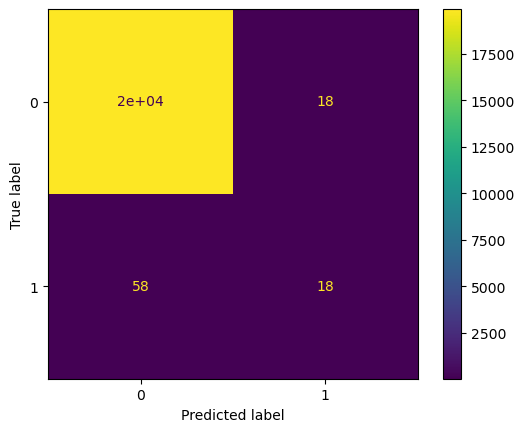

In [298]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
disp.plot()